<a href="https://colab.research.google.com/github/Sainithinreddyk/SaiNithinReddy_INFO5731_-Spring2023/blob/main/Nithin_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The df can be download from canvas. The df contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [168]:
# Write your code here


import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [169]:
with open("stsa-train.txt") as txtf:
    mylist = [line.rstrip('\n') for line in txtf]
    
labels = []
text = []

for i, line in enumerate(mylist):
    label = mylist[i][0]
    tex = mylist[i][1:]
    labels.append(label)
    text.append(tex)

df = pd.DataFrame(list(zip(labels, text)),columns =['Reviews', 'Text'])
df.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [170]:
import nltk
nltk.download()
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Package abc is already up-to-date!
       | Downloading package alpino to /root/nltk_data...
       |   Package alpino is already up-to-date!
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger is already up-to-date!
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Package averaged_perceptron_tagger_ru is already up-to-
       |       date!
       | Downloading package basque_grammars to /root/nltk_data...
       |   Package basque_grammars is already up-to-date!
       | Downloading package bcp47 to /root/nltk_data...
       |   Package bcp47 is already up-to-date!
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Package biocreative_ppi is already up-to-date!
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Packag


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [171]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))


In [172]:
def get_text_data(file_name):
  with open(file_name) as txtf:
      mylist = [line.strip('\n') for line in txtf]
      
  labels = []
  text = []

  for i, line in enumerate(mylist):
      label = mylist[i][0]
      tex = mylist[i][1:]
      labels.append(label)
      text.append(tex)
  return labels, text

train_data = get_text_data("stsa-train.txt")
train_df = pd.DataFrame(list(zip(train_data[0], train_data[1])),columns =['Reviews', 'Text'])
train_df.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


In [173]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Cleaning Train Data**

In [174]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()


nltk.download('stopwords')

# initialize stemmer
stemmer = PorterStemmer()

# define preprocess function
def preprocess(text):
    # remove numbers and punctuation
    rem_num = text.replace('\d+', '')
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

# apply preprocess function to 'Text' column
df['clean_Text'] = df['Text'].map(lambda s: preprocess(s))
df.head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Reviews,Text,clean_Text
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting imagining ...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cutting room floor give...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby end modern office ano...
5,1,campanella gets the tone just right -- funny ...,campanella gets tone right funny middle sad mi...
6,0,a fan film that for the uninitiated plays bet...,fan film uninitiated plays better video sound ...
7,1,"béart and berling are both superb , while hup...",béart berling superb huppert magnificent
8,0,"a little less extreme than in the past , with...",little less extreme past longer exposition seq...
9,0,the film is strictly routine .,film strictly routine


**TEST DATA**

In [175]:
with open("stsa-test.txt") as txtf:
    mylist_test = [line.rstrip('\n') for line in txtf]

labels_test = []
text_test = []

for line in mylist_test:
    label_test, tex_test = line[0], line[1:]
    labels_test.append(label_test)
    text_test.append(tex_test)

df_test = pd.DataFrame({'Reviews': labels_test, 'Text': text_test})
df_test.head()


,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


**Cleaning Test data**

In [176]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    clean_text = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',clean_text)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)


df_test['clean_text']=df_test['Text'].map(lambda s:preprocess(s)) 
df_test.head()

,Reviews,Text,clean_text
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(train_df["Text"]).toarray()
test_tfidf = tfidf_vectorizer.transform(df_test["Text"]).toarray()

In [178]:
x_test = test_tfidf
y_test = df_test["Reviews"]

In [179]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_tfidf,df["Reviews"],test_size = 0.2, random_state = 202)

**1. Multinomial NB**

In [180]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create and train the model
classifier = MultinomialNB()
model = classifier.fit(x_train, y_train) 

# Make predictions on the validation set
predictions_validation_set = classifier.predict(x_valid) 

# Calculate performance metrics
accuracy = round(accuracy_score(y_valid, predictions_validation_set) * 100)
precision = round(precision_score(y_valid, predictions_validation_set, pos_label='0') * 100)
recall = round(recall_score(y_valid, predictions_validation_set, pos_label='0') * 100)
f1 = round(f1_score(y_valid, predictions_validation_set, pos_label='0') * 100)

# Print the results
print("Accuracy of the NB: {}%".format(accuracy))
print("Precision of the NB: {}%".format(precision))
print("Recall of the NB: {}%".format(recall))
print("F1 Score of the NB: {}%".format(f1))


Accuracy of the NB: 79%
Precision of the NB: 82%
Recall of the NB: 72%
F1 Score of the NB: 77%


In [181]:
from sklearn.metrics import classification_report

cr_naive_validation = classification_report(y_valid, predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_naive_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.82      0.72      0.77       667
           1       0.77      0.85      0.81       717

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [182]:
from sklearn.model_selection import cross_val_score
naive_accuracies_validation = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print(f"Nb 10-fold cross validation score on training set is :  {round(naive_accuracies_validation.mean()*100)}%")

Nb 10-fold cross validation score on training set is :  79%


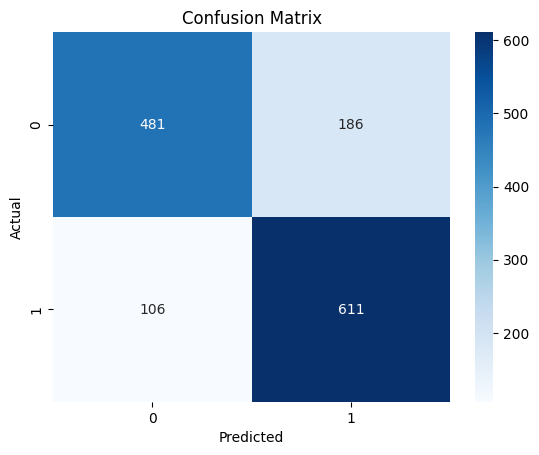

In [183]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_valid, predictions_validation_set)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [184]:
predictions_test_set = classifier.predict(x_test) 
print ("Accuracy of the NB test set is : ", round(accuracy_score(y_test, predictions_test_set)*100),"%")
print ("Percision of  the NB test set is: ", round(precision_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the NB test set is : ", round(recall_score(y_test, predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the NB test set is : ", round(f1_score(y_test, predictions_test_set, pos_label='0')*100),"%")

Accuracy of the NB test set is :  80 %
Percision of  the NB test set is:  85 %
Recall of the NB test set is :  74 %
F1 Score of the NB test set is :  79 %


In [185]:
cr_naive_test = classification_report(y_test, predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_naive_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.85      0.74      0.79       912
           1       0.77      0.87      0.82       909

    accuracy                           0.80      1821
   macro avg       0.81      0.80      0.80      1821
weighted avg       0.81      0.80      0.80      1821



In [186]:
naive_accuracies_test = cross_val_score(estimator = classifier, X = x_test, y = y_test, cv = 10)

print(f"NB 10-fold cross validation score on testing set is :  {round(naive_accuracies_test.mean()*100)}%")

NB 10-fold cross validation score on testing set is :  75%


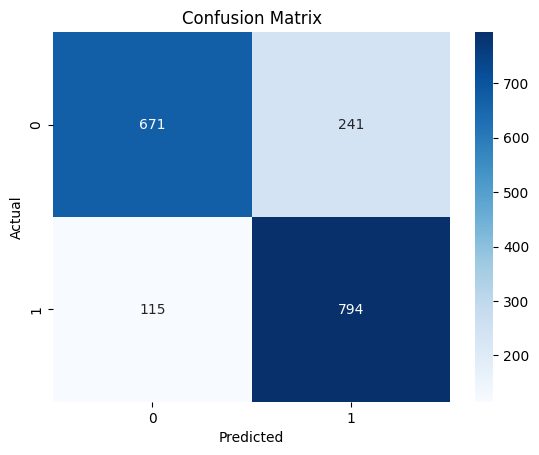

In [187]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
cm = confusion_matrix(y_test, predictions_test_set)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


# **2.SVM**

In [188]:
"""from sklearn import SVC
svs = SVC()
scores = cross_val_score(svs, x_train, y_train, cv=10, scoring='accuracy')
print("SVM Mean accuracy: ", scores.mean())
svs.fit(x_train, y_train)
y_pred_svm = svs.predict(x_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))"""

SyntaxError: ignored

# **KNN**

In [189]:
# Import the KNeighborsClassifier from the Scikit-Learn library
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier class with 15 neighbors
classifier_knn = KNeighborsClassifier(n_neighbors = 15)

# Train the model on the training set using the fit() method
model_knn = classifier_knn.fit(x_train, y_train) 

# Generate predictions for the validation set using the predict() method
knn_predictions_validation_set = classifier_knn.predict(x_valid) 

# Compute and print out the evaluation metrics for the KNN model on the validation set
print ("Accuracy of the KNN  : ", round(accuracy_score(y_valid, knn_predictions_validation_set)*100),"%")
print ("Precision of the KNN  : ", round(precision_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the KNN : ", round(recall_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN : ", round(f1_score(y_valid, knn_predictions_validation_set, pos_label='0')*100),"%")


Accuracy of the KNN  :  73 %
Precision of the KNN  :  75 %
Recall of the KNN :  67 %
F1 Score of the KNN :  71 %


In [190]:
from sklearn.metrics import classification_report

cr_knn_validation = classification_report(y_valid, knn_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_knn_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.75      0.67      0.71       667
           1       0.72      0.79      0.75       717

    accuracy                           0.73      1384
   macro avg       0.73      0.73      0.73      1384
weighted avg       0.73      0.73      0.73      1384



Confusion Matrix:
 [[447 220]
 [151 566]]


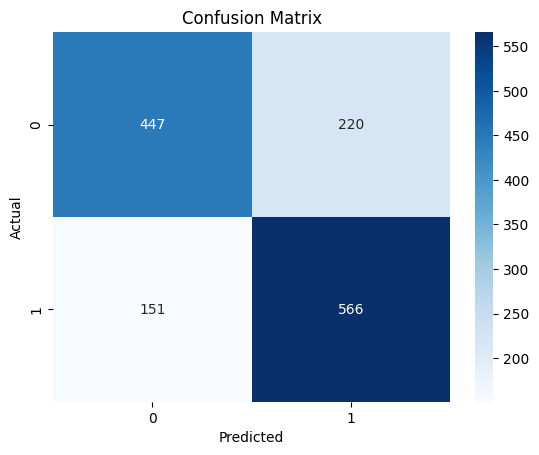

In [191]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the KNN model on the validation set
cm_knn_validation = confusion_matrix(y_valid, knn_predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_knn_validation)

# Plot the confusion matrix
sns.heatmap(cm_knn_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [192]:
from sklearn.model_selection import cross_val_score
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)

print(f"KNN Model  10-fold cross validation score on training set is :  {round(knn_accuracies_validation.mean()*100)}%")

KNN Model  10-fold cross validation score on training set is :  73%


In [193]:
knn_predictions_test_set = classifier_knn.predict(x_test) 
print ("Accuracy of the KNN model on test set is : ", round(accuracy_score(y_test, knn_predictions_test_set)*100),"%")
print ("Percision of the KNN model on validation set is : ", round(precision_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the KNN model on validation set is : ", round(recall_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the KNN model on validation set is : ", round(f1_score(y_test, knn_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the KNN model on test set is :  76 %
Percision of the KNN model on validation set is :  79 %
Recall of the KNN model on validation set is :  70 %
F1 Score of the KNN model on validation set is :  74 %


In [194]:
cr_knn_test = classification_report(y_test, knn_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_knn_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       912
           1       0.73      0.82      0.77       909

    accuracy                           0.76      1821
   macro avg       0.76      0.76      0.75      1821
weighted avg       0.76      0.76      0.75      1821



In [195]:
knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_test, y = y_test, cv = 10)

print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knn_accuracies_test.mean()*100)}%")

KNN Model 10-fold cross validation score on testing set is :  70%


Confusion Matrix:
 [[634 278]
 [167 742]]


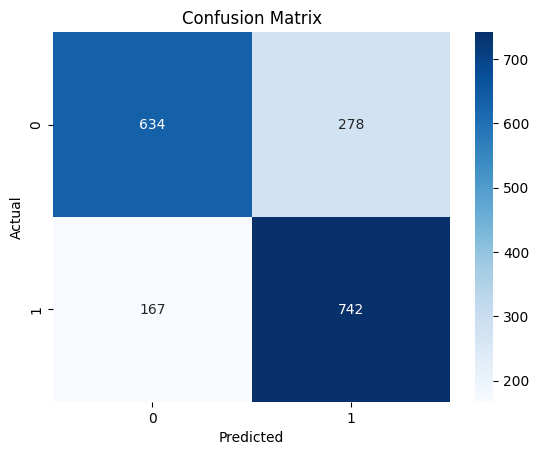

In [196]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the KNN model on the test set
cm_knn_test = confusion_matrix(y_test, knn_predictions_test_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_knn_test)

# Plot the confusion matrix
sns.heatmap(cm_knn_test, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



# **DECISION TREE**

In [197]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
model_dt = classifier_dt.fit(x_train, y_train) 
dt_predictions_validation_set = classifier_dt.predict(x_valid) 

print ("Accuracy of the Decison Tree Classifier model on validation set is : ", round(accuracy_score(y_valid, dt_predictions_validation_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_valid, dt_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on validation set is :  61 %
Percision of the Decison Tree Classifier model on validation set is :  60 %
Recall of the Decison Tree Classifier model on validation set is :  58 %
F1 Score of the Decison Tree Classifier model on validation set is :  59 %


In [198]:
from sklearn.metrics import classification_report

cr_dt_validation = classification_report(y_valid, dt_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_dt_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.60      0.58      0.59       667
           1       0.62      0.64      0.63       717

    accuracy                           0.61      1384
   macro avg       0.61      0.61      0.61      1384
weighted avg       0.61      0.61      0.61      1384



In [199]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Decision Tree model on the validation set
cm_dt_validation = confusion_matrix(y_valid, dt_predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_dt_validation)

Confusion Matrix:
 [[384 283]
 [261 456]]


Confusion Matrix:
 [[634 278]
 [167 742]]


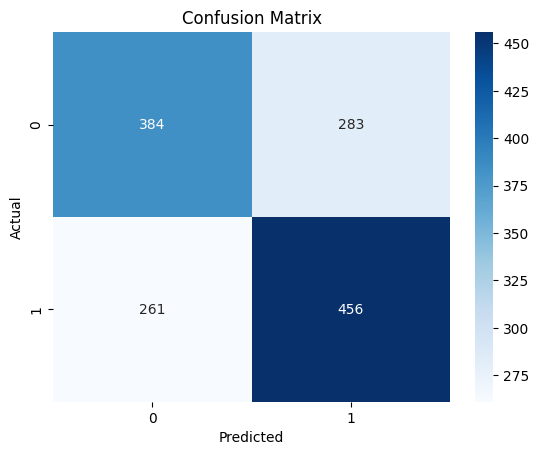

In [200]:
# Print the confusion matrix
print("Confusion Matrix:\n", cm_knn_test)

# Plot the confusion matrix
sns.heatmap(cm_dt_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [201]:
from sklearn.model_selection import cross_val_score
dt_accuracies_validation = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)

print(f"Decison Tree Classifier Model  10-fold cross validation score on training set is :  {round(dt_accuracies_validation.mean()*100)}%")

Decison Tree Classifier Model  10-fold cross validation score on training set is :  61%


In [202]:
dt_predictions_test_set = classifier_dt.predict(x_test) 
print ("Accuracy of the Decison Tree Classifier model on test set is : ", round(accuracy_score(y_test, dt_predictions_test_set)*100),"%")
print ("Percision of the Decison Tree Classifier model on validation set is : ", round(precision_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Decison Tree Classifier model on validation set is : ", round(recall_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Decison Tree Classifier model on validation set is : ", round(f1_score(y_test, dt_predictions_test_set, pos_label='0')*100),"%")

Accuracy of the Decison Tree Classifier model on test set is :  62 %
Percision of the Decison Tree Classifier model on validation set is :  63 %
Recall of the Decison Tree Classifier model on validation set is :  59 %
F1 Score of the Decison Tree Classifier model on validation set is :  61 %


In [203]:
cr_dt_test = classification_report(y_test, dt_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_dt_test)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.63      0.59      0.61       912
           1       0.61      0.65      0.63       909

    accuracy                           0.62      1821
   macro avg       0.62      0.62      0.62      1821
weighted avg       0.62      0.62      0.62      1821



Confusion Matrix:
 [[538 374]
 [316 593]]


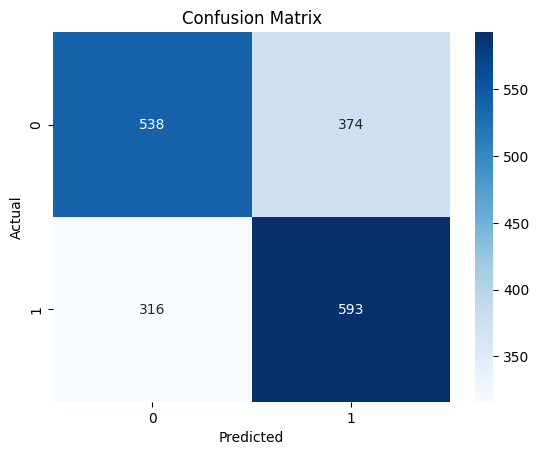

In [204]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Decision Tree model on the test set
cm_dt_test = confusion_matrix(y_test, dt_predictions_test_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_dt_test)

# Plot the confusion matrix
sns.heatmap(cm_dt_test, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()



# **RANDOM FOREST**

In [205]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
model_rf = classifier_rf.fit(x_train, y_train) 
rf_predictions_validation_set = classifier_rf.predict(x_valid) 

print ("Accuracy of the Random Forest Classifier model on validation set is : ", round(accuracy_score(y_valid, rf_predictions_validation_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_valid, rf_predictions_validation_set, pos_label='0')*100),"%")

Accuracy of the Random Forest Classifier model on validation set is :  71 %
Percision of the Random Forest Classifier model on validation set is :  72 %
Recall of the Random Forest Classifier model on validation set is :  65 %
F1 Score of the Random Forest Classifier model on validation set is :  68 %


In [206]:
from sklearn.metrics import classification_report

cr_rf_validation = classification_report(y_valid, rf_predictions_validation_set)
print("Classification Report: ", "\n", "\n",cr_rf_validation)

Classification Report:  
 
               precision    recall  f1-score   support

           0       0.72      0.65      0.68       667
           1       0.70      0.77      0.73       717

    accuracy                           0.71      1384
   macro avg       0.71      0.71      0.71      1384
weighted avg       0.71      0.71      0.71      1384



Confusion Matrix:
 [[433 234]
 [168 549]]


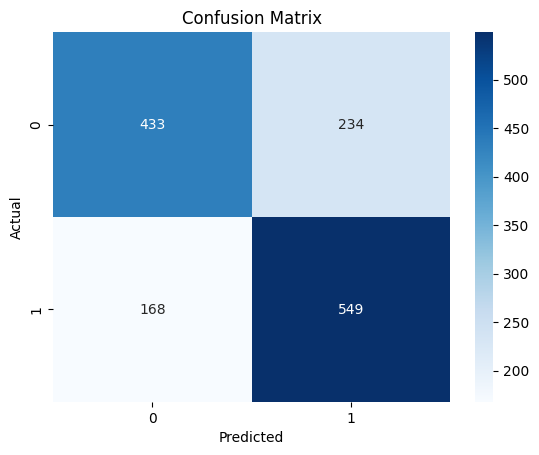

In [207]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Random Forest model on the validation set
cm_rf_validation = confusion_matrix(y_valid, rf_predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_rf_validation)

# Plot the confusion matrix
sns.heatmap(cm_rf_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model  10-fold cross validation score on training set is :  {round(rf_accuracies_validation.mean()*100)}%")

In [ ]:
rf_predictions_test_set = classifier_rf.predict(x_test) 
print ("Accuracy of the Random Forest Classifier model on test set is : ", round(accuracy_score(y_test, rf_predictions_test_set)*100),"%")
print ("Percision of the Random Forest Classifier model on validation set is : ", round(precision_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("Recall of the Random Forest Classifier model on validation set is : ", round(recall_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")
print ("F1 Score of the Random Forest Classifier model on validation set is : ", round(f1_score(y_test, rf_predictions_test_set, pos_label='0')*100),"%")

In [ ]:
cr_rf_test = classification_report(y_test, rf_predictions_test_set)
print("Classification Report: ", "\n", "\n",cr_rf_test)

In [ ]:
# Import the confusion_matrix function from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the Random Forest model on the test set
cm_rf_test = confusion_matrix(y_test, rf_predictions_test_set)

# Print the confusion matrix
print("Confusion Matrix:\n", cm_rf_test)



# Plot the confusion matrix
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_test, y = y_test, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation score on testing set is :  {round(rf_accuracies_test.mean()*100)}%")

# **XG BOOST**

In [ ]:
"""y_train_dup = y_train.astype(int)
y_train_dup.dtype"""

In [ ]:
"""y_test_dup = y_test.astype(int)
y_test_dup.dtype"""

In [ ]:
"""from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
# model_xgb = train_model(classifier_xgb, x_train, y_train_dup, x_test, "XG Boost model")

model_xgb = classifier_xgb.fit(x_train, y_train_dup)
predictions_validation_set = model_xgb.predict(x_test)

print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_test_dup, predictions_validation_set)*100)}%")
"""


In [ ]:
"""cr_XG_validation = classification_report(y_test_dup, predictions_validation_set)
print("Classification Report on train: ", "\n", "\n",cr_XG_validation)"""

In [ ]:
"""from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for the XGBoost model on the validation set
cm_XG_validation = confusion_matrix(y_test_dup, predictions_validation_set)

# Print the confusion matrix
print("Confusion Matrix on validation set:\n", cm_XG_validation)



# Plot the confusion matrix
sns.heatmap(cm_XG_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()"""

In [ ]:
"""from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
xgb_accuracies_validation = cross_val_score(estimator = classifier_xgb, X = x_train, y = y_train_dup, cv = 10)

print(f"XGBoost Model  10-fold cross validation score on training set is :  {round(xgb_accuracies_validation.mean()*100)}%")"""

In [ ]:
""""# test_model(model_xgb, x_valid, y_valid, "XG Boost Model")
predictions_test_set = model_xgb.predict(x_valid)
y_valid_dup = y_valid.astype(int)
y_valid_dup.dtype
print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_valid_dup, predictions_test_set)*100)}%")

cr_XG_validation = classification_report(y_valid_dup, predictions_test_set)
print("Classification Report on train: ", "\n", "\n",cr_XG_validation)""""

In [ ]:
"""# Plot the confusion matrix
sns.heatmap(cm_XG_validation, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()"""

In [ ]:
"""xgb_accuracies_test = cross_val_score(estimator = classifier_xgb, X = x_valid, y = y_valid_dup, cv = 10)

print(f"XGBoost Classifier Model 10-fold cross validation score on testing set is :  {round(xgb_accuracies_test.mean()*100)}%")"""

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the df by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the df:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 